# Logistic, Random forest, or KNN (Core)
- **Student:** Michael McCann
- **Date:** 11 MAR 2022

## Setup -Mount Drive, Import Libraries and Data

In [115]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import set_config
set_config(display='diagram')

In [117]:
## Load and Inspect the Data
wine_filepath = '/content/drive/MyDrive/Data/Wine_cultivars.csv'
wine_df = pd.read_csv(wine_filepath)

wine_df.columns = wine_df.columns.str.lower()

print(wine_df.info())
wine_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class label                   178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity of ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavonid phenols           178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315 of diluted wines  178 non-null    float64
 13  proli

,class label,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavonid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [118]:
## No Duplicates or NAs
print(f"Number of NAs: {wine_df.isna().sum().sum()}")
print(f"Number of Duplicates: {wine_df.duplicated().sum()}")

Number of NAs: 0
Number of Duplicates: 0


In [119]:
# Check the balance of the target column
wine_df['class label'].value_counts()

2    71
1    59
3    48
Name: class label, dtype: int64

In [120]:
# Define X,y. Run TTS 
y = wine_df['class label']
X = wine_df.drop(columns = ['class label', 'proline'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

## Logistic Regression

In [121]:
# baseline model test
# Create pipe with scaler and logreg model
scaler = StandardScaler()
log_pipe = make_pipeline(scaler, LogisticRegression())

# fit pipe
log_pipe.fit(X_train, y_train)

print(f'baseline training score: {log_pipe.score(X_train, y_train):.3f}')
print(f'baseline test score: {log_pipe.score(X_test, y_test):.3f}')


baseline training score: 1.000
baseline test score: 0.956


In [122]:
# L1 Tuning
c_values = [.001, .01, .1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
    log_reg = LogisticRegression(C=c, max_iter = 1000,
                                 solver = 'liblinear', penalty = 'l1')
    log_pipe = make_pipeline(scaler, log_reg)
    log_pipe.fit(X_train, y_train)

    train_scores.append(log_pipe.score(X_train, y_train))
    test_scores.append(log_pipe.score(X_test, y_test))

1.000000    1000.000
1.000000     100.000
1.000000      10.000
0.977778       1.000
0.933333       0.100
0.333333       0.010
0.333333       0.001
dtype: float64

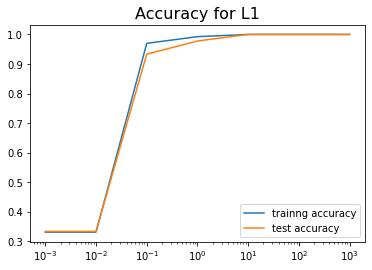

In [123]:
#L1 C value plotting
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'trainng accuracy')
ax.plot(c_values, test_scores, label = 'test accuracy')
ax.set_xticks(c_values)
ax.set_title('Accuracy for L1', fontsize = 16)
ax.legend()
ax.set_xscale('log')

l1_val = pd.Series(c_values, test_scores).sort_values(ascending = False)
l1_val

In [124]:
# L2 Tuning
c_values = [.001, .01, .1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
    log_reg = LogisticRegression(C=c, max_iter = 1000,
                                 solver = 'liblinear', penalty = 'l2')
    log_pipe = make_pipeline(scaler, log_reg)
    log_pipe.fit(X_train, y_train)

    train_scores.append(log_pipe.score(X_train, y_train))
    test_scores.append(log_pipe.score(X_test, y_test))

1.000000    1000.000
1.000000     100.000
1.000000      10.000
0.977778       1.000
0.955556       0.100
0.933333       0.010
0.888889       0.001
dtype: float64

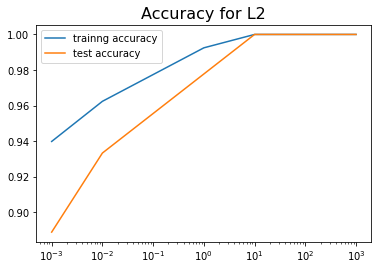

In [125]:
#L2 C value plotting
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label = 'trainng accuracy')
ax.plot(c_values, test_scores, label = 'test accuracy')
ax.set_xticks(c_values)
ax.set_title('Accuracy for L2', fontsize = 16)
ax.legend()
ax.set_xscale('log')

l2_val = pd.Series(c_values, test_scores).sort_values(ascending = False)
l2_val

In [126]:
#logreg best
log_reg_best = LogisticRegression(C=10, max_iter = 1000,
                                  solver = 'liblinear', penalty = 'l2')
log_pipe_best = make_pipeline(scaler, log_reg_best)

# fit pipe
log_pipe_best.fit(X_train, y_train)

print(f'Log Reg Best training score: {log_pipe_best.score(X_train, y_train):.3f}')
print(f'Log Reg Best test score: {log_pipe_best.score(X_test, y_test):.3f}')

Log Reg Best training score: 1.000
Log Reg Best test score: 1.000


## KNN 

In [127]:
# Baseline model
knn_pipe = make_pipeline(scaler, KNeighborsClassifier())
knn_pipe.fit(X_train, y_train)

print(f'baseline training score: {knn_pipe.score(X_train, y_train):.3f}')
print(f'baseline test score: {knn_pipe.score(X_test, y_test):.3f}')

baseline training score: 0.977
baseline test score: 0.911


In [128]:
# Find best n_neighbors
neighbors = list(range(1,22))
train_scores = []
test_scores = []

for n in neighbors:
    knn_pipe = make_pipeline(scaler, KNeighborsClassifier(n_neighbors = n))
    knn_pipe.fit(X_train, y_train)

    train_scores.append(knn_pipe.score(X_train, y_train))
    test_scores.append(knn_pipe.score(X_test, y_test))

13    0.955556
19    0.955556
18    0.955556
17    0.955556
7     0.955556
dtype: float64

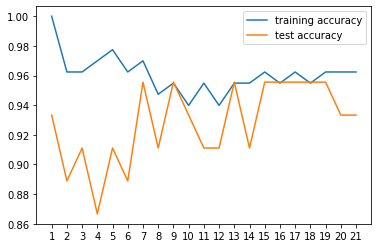

In [129]:
fig, ax = plt.subplots(1,1)
ax.plot(neighbors, train_scores, label = 'training accuracy')
ax.plot(neighbors, test_scores, label = 'test accuracy')
ax.set_xticks(neighbors)
ax.legend()

n_val = pd.Series(test_scores, neighbors).sort_values(ascending = False)
n_val.head(5)

In [130]:
# KNN Best
knn_pipe_best = make_pipeline(scaler, KNeighborsClassifier(n_neighbors = 7))
knn_pipe_best.fit(X_train, y_train)

print(f'KNN Best training score: {knn_pipe_best.score(X_train, y_train):.3f}')
print(f'KNN Best test score: {knn_pipe_best.score(X_test, y_test):.3f}')

KNN Best training score: 0.970
KNN Best test score: 0.956


## Random Forest

In [136]:
#Baseline RF model
rf = RandomForestClassifier()
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(X_train, y_train)

print(f'baseline training score: {rf_pipe.score(X_train, y_train):.3f}')
print(f'baseline test score: {rf_pipe.score(X_test, y_test):.3f}')

baseline training score: 1.000
baseline test score: 0.978


In [132]:
# Find ideal max depth
depth_val = list(range(1,100))
train_scores = []
test_scores = []

for val in depth_val:
    rf = RandomForestClassifier(max_depth=val)
    rf_pipe = make_pipeline(scaler, rf)
    rf_pipe.fit(X_train, y_train)

    train_scores.append(rf_pipe.score(X_train, y_train))
    test_scores.append(rf_pipe.score(X_test, y_test))

28    1.000000
10    1.000000
50    0.977778
85    0.977778
59    0.977778
dtype: float64

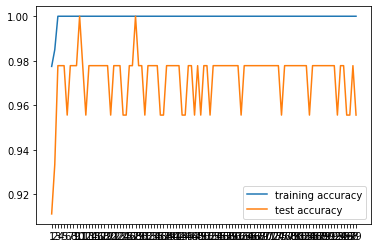

In [133]:
fig, ax = plt.subplots(1,1)
ax.plot(depth_val, train_scores, label = 'training accuracy')
ax.plot(depth_val, test_scores, label = 'test accuracy')
ax.set_xticks(depth_val)
ax.legend();

rf_val = pd.Series(test_scores, depth_val).sort_values(ascending = False)
rf_val.head(5)

In [137]:
# Best RF
rf_best = RandomForestClassifier(max_depth=28)
rf_pipe_best = make_pipeline(scaler, rf_best)
rf_pipe_best.fit(X_train, y_train)

print(f'baseline training score: {rf_pipe_best.score(X_train, y_train):.3f}')
print(f'baseline test score: {rf_pipe_best.score(X_test, y_test):.3f}')

baseline training score: 1.000
baseline test score: 0.978


In [139]:
#Compare the values
print('LOGISTIC REGRESSION')
print(f'Log Reg Best training score: {log_pipe_best.score(X_train, y_train):.3f}')
print(f'Log Reg Best test score: {log_pipe_best.score(X_test, y_test):.3f}')
print('\n-----\n')
print('KNN')
print(f'KNN Best training score: {knn_pipe_best.score(X_train, y_train):.3f}')
print(f'KNN Best test score: {knn_pipe_best.score(X_test, y_test):.3f}')
print('\n-----\n')
print('RANDOM FOREST')
print(f'baseline training score: {rf_pipe_best.score(X_train, y_train):.3f}')
print(f'baseline test score: {rf_pipe_best.score(X_test, y_test):.3f}')

LOGISTIC REGRESSION
Log Reg Best training score: 1.000
Log Reg Best test score: 1.000

-----

KNN
KNN Best training score: 0.970
KNN Best test score: 0.956

-----

RANDOM FOREST
baseline training score: 1.000
baseline test score: 0.978


The tuned Logistic Regression model perfomred better than both the KNN and Random Forest models. Regularizing either the L1 or L2 allowed us to reach 100% accuracy. 